In [1]:
# Importing the libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creating dataframe

df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


- Here in the Outcome column if result is `1` then person is diabetic or else he is non diabetic.
- So it is a **Binary Classification**.

In [3]:
# shape of the dataset

df.shape

(768, 9)

### EDA part:

In [4]:
# getting statistical analysis about the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Here we don't have any categorical column and all are numeric columns.

In [6]:
# let's check for null values and duplicate rows

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- So there are no null values in the dataset.

In [7]:
df.duplicated().sum()

0

- So there are no duplicate rows also in the dataset.

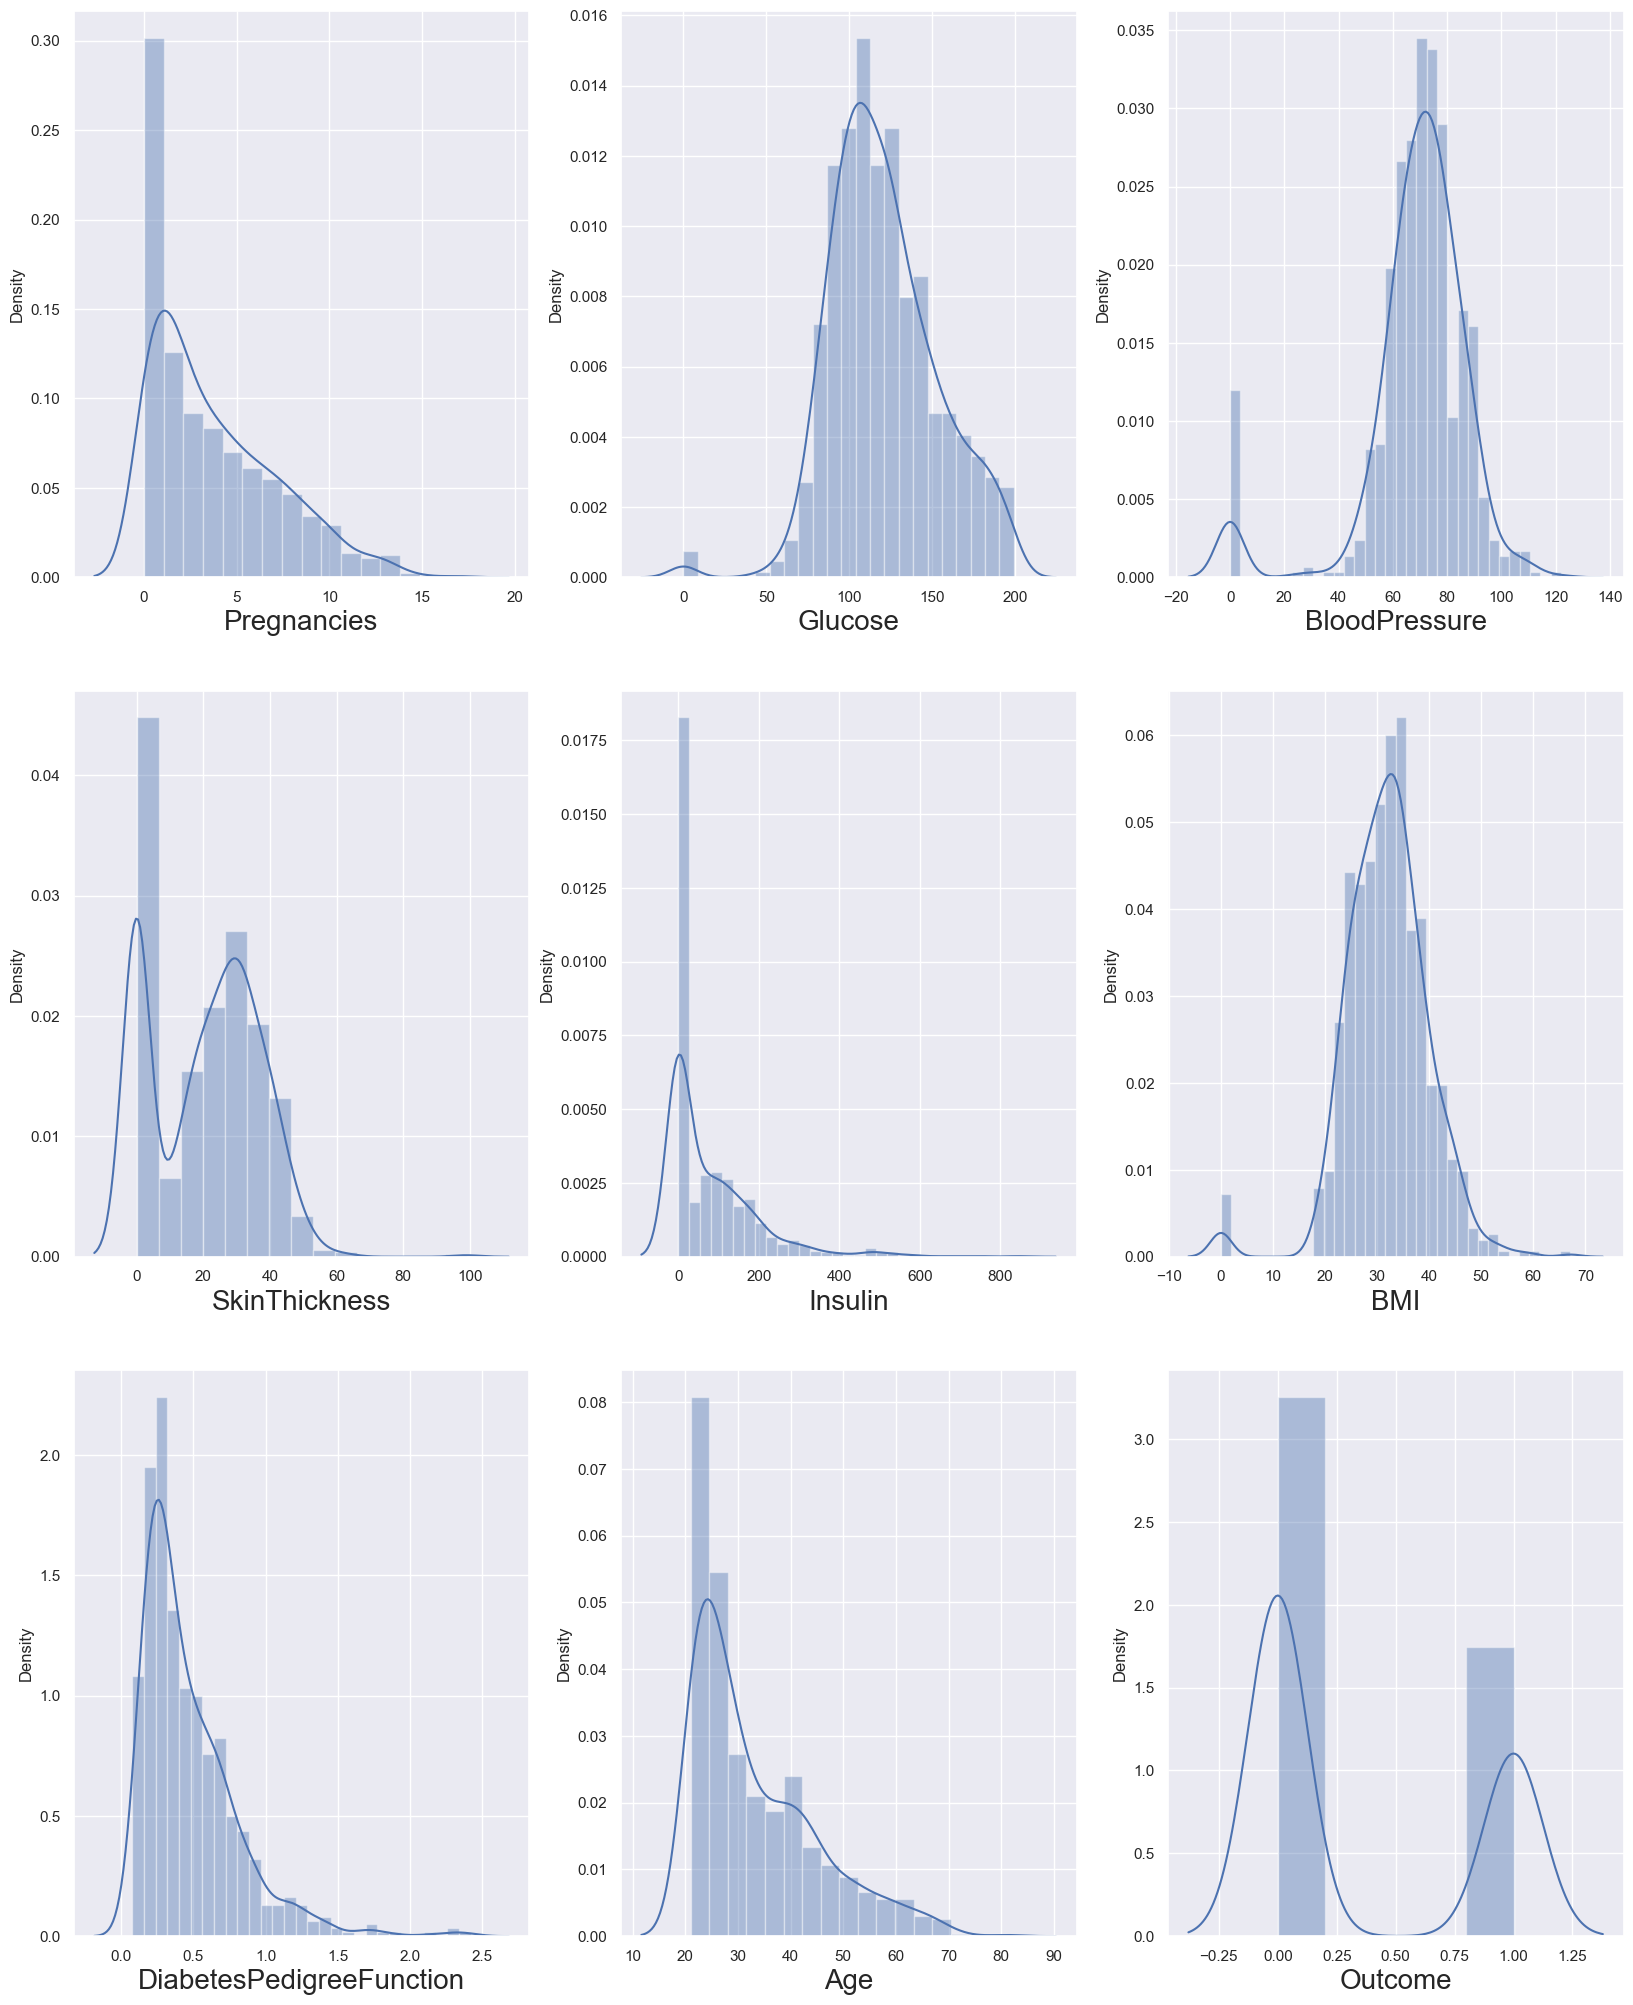

In [8]:
# As here we don't have any category column and all are numeric column 
# so let's check the distribution of the data for all columns


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- We can see there is some skewness in the data, let's deal with data.

- Also, we can see there few data for columns `Glucose`, `Insulin`, `skin thickness`, `BMI and Blood Pressure` which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

- In `Age` column most of the persons are aged between 20 and 40 and after the age of 70 there are very less number of people. 

- There are outliers in many columns.

In [10]:
# replacing all the 0 values in all the columns with the mean of that column

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

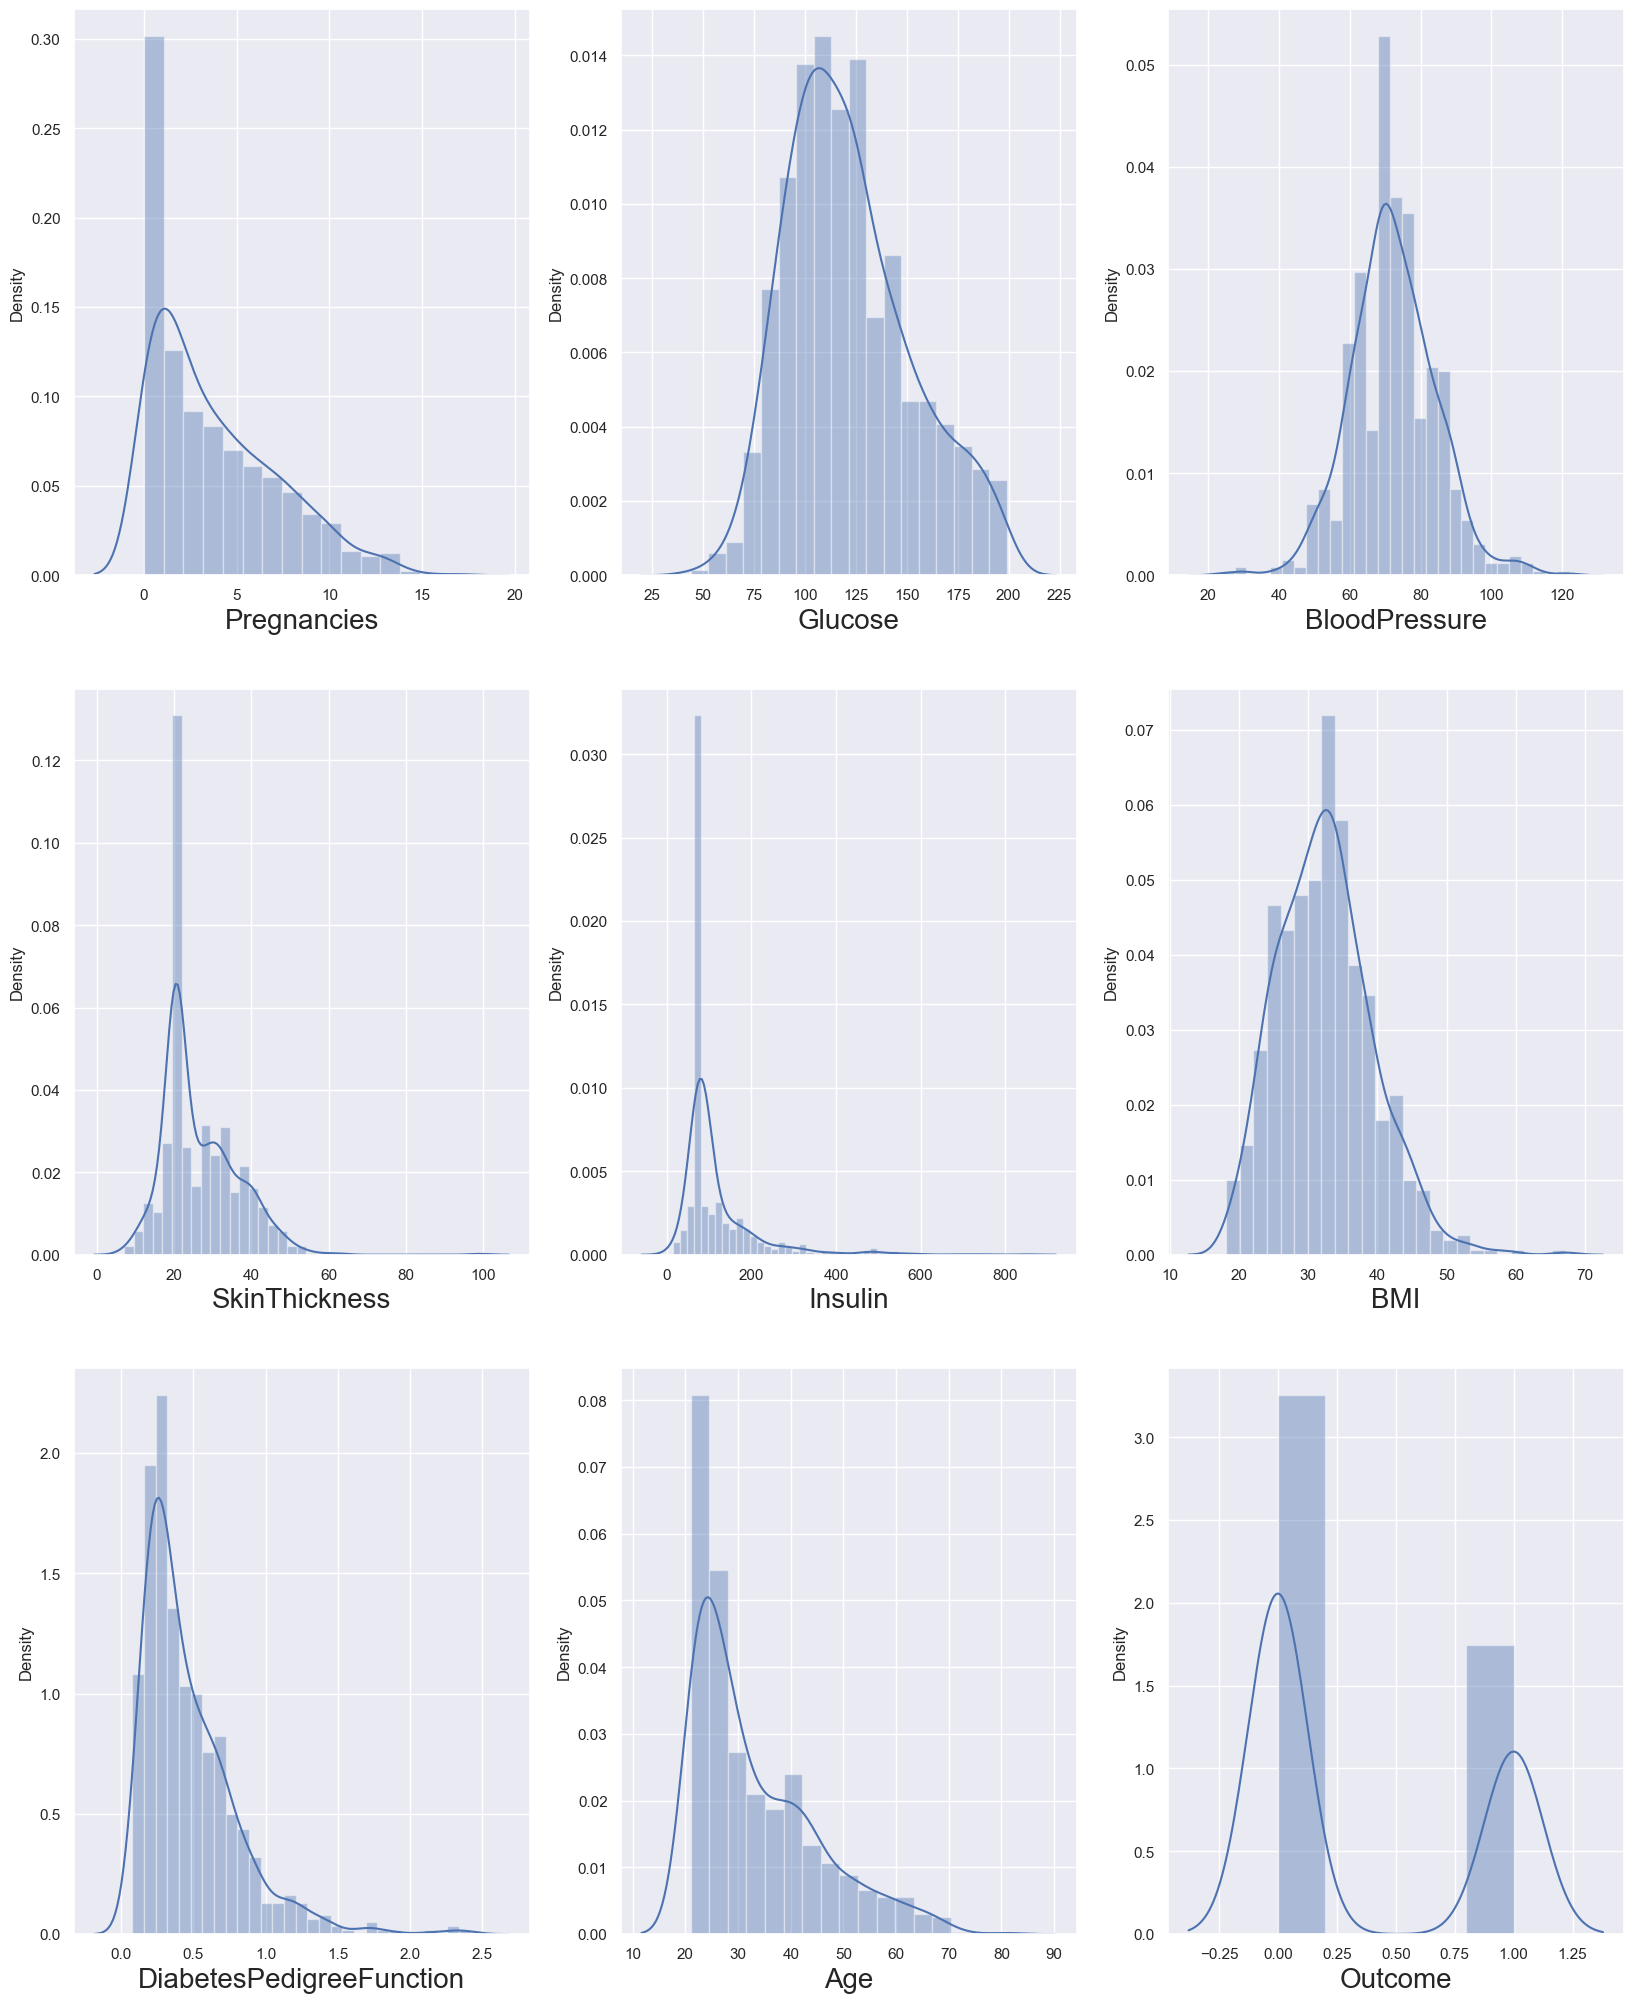

In [11]:
# Now again see the distribution of data after replacing the values

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

<AxesSubplot:>

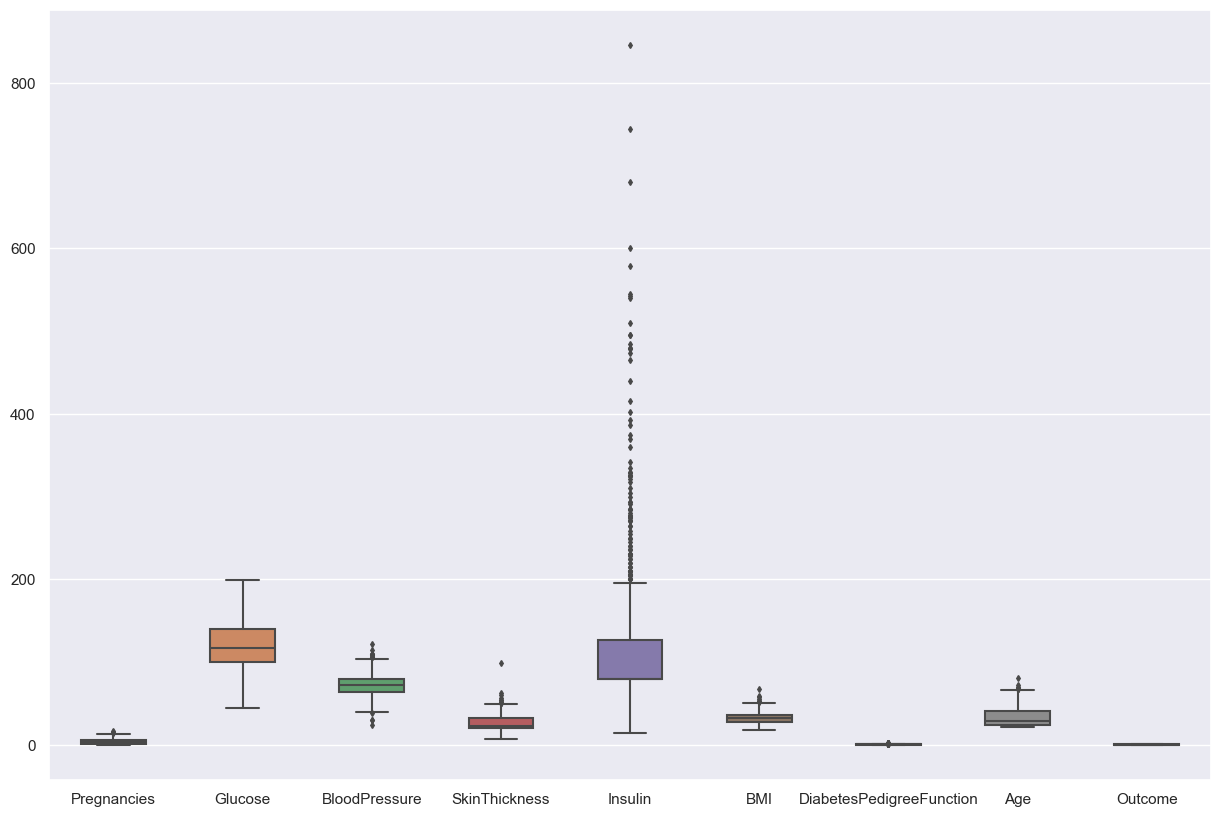

In [12]:
# Now checking for the outliers
# Here we plot a boxplot for each and every variables to find the outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5, ax=ax, fliersize=3)

- Here we can see 
    - `Pregnancies` has very little dispersion.
    - `Glucose` and `DiabetesPedigreeFunction` have no outliers.
    - `BloodPressure` has very little outliers on both upper bound and lower bound.
    - `SkinThickness`, `BMI` and `Age` also has a very little outliers.
    - `Insulin` has the highest number of outliers. 

**Handling the outliers using Quantiles**

In [14]:
# Clarification
# value of 100 percentile data 

df['Pregnancies'].quantile(1.00)

17.0

In [16]:
# value of 98 percentile data
# So we will remove all the data points after the value 12.0

df['Pregnancies'].quantile(0.98)

12.0

In [17]:
# we are removing the top 2% data from the Pregnancies column keeping the 98 percentile data
q = df['Pregnancies'].quantile(0.98)
data_cleaned = df[df['Pregnancies']<q]

# we are removing the top 1% data from the BMI column
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]


# we are removing the top 1% data from the SkinThickness column
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]


# we are removing the top 5% data from the Insulin column
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]


# we are removing the top 1% data from the DiabetesPedigreeFunction column
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]


# we are removing the top 1% data from the Age column
q = data_cleaned['Age'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [18]:
# Checking the shape of the clean data

data_cleaned.shape

(674, 9)

- Here we can see the number of rows got removed from the actual data as we have removed some rows with outliered data.

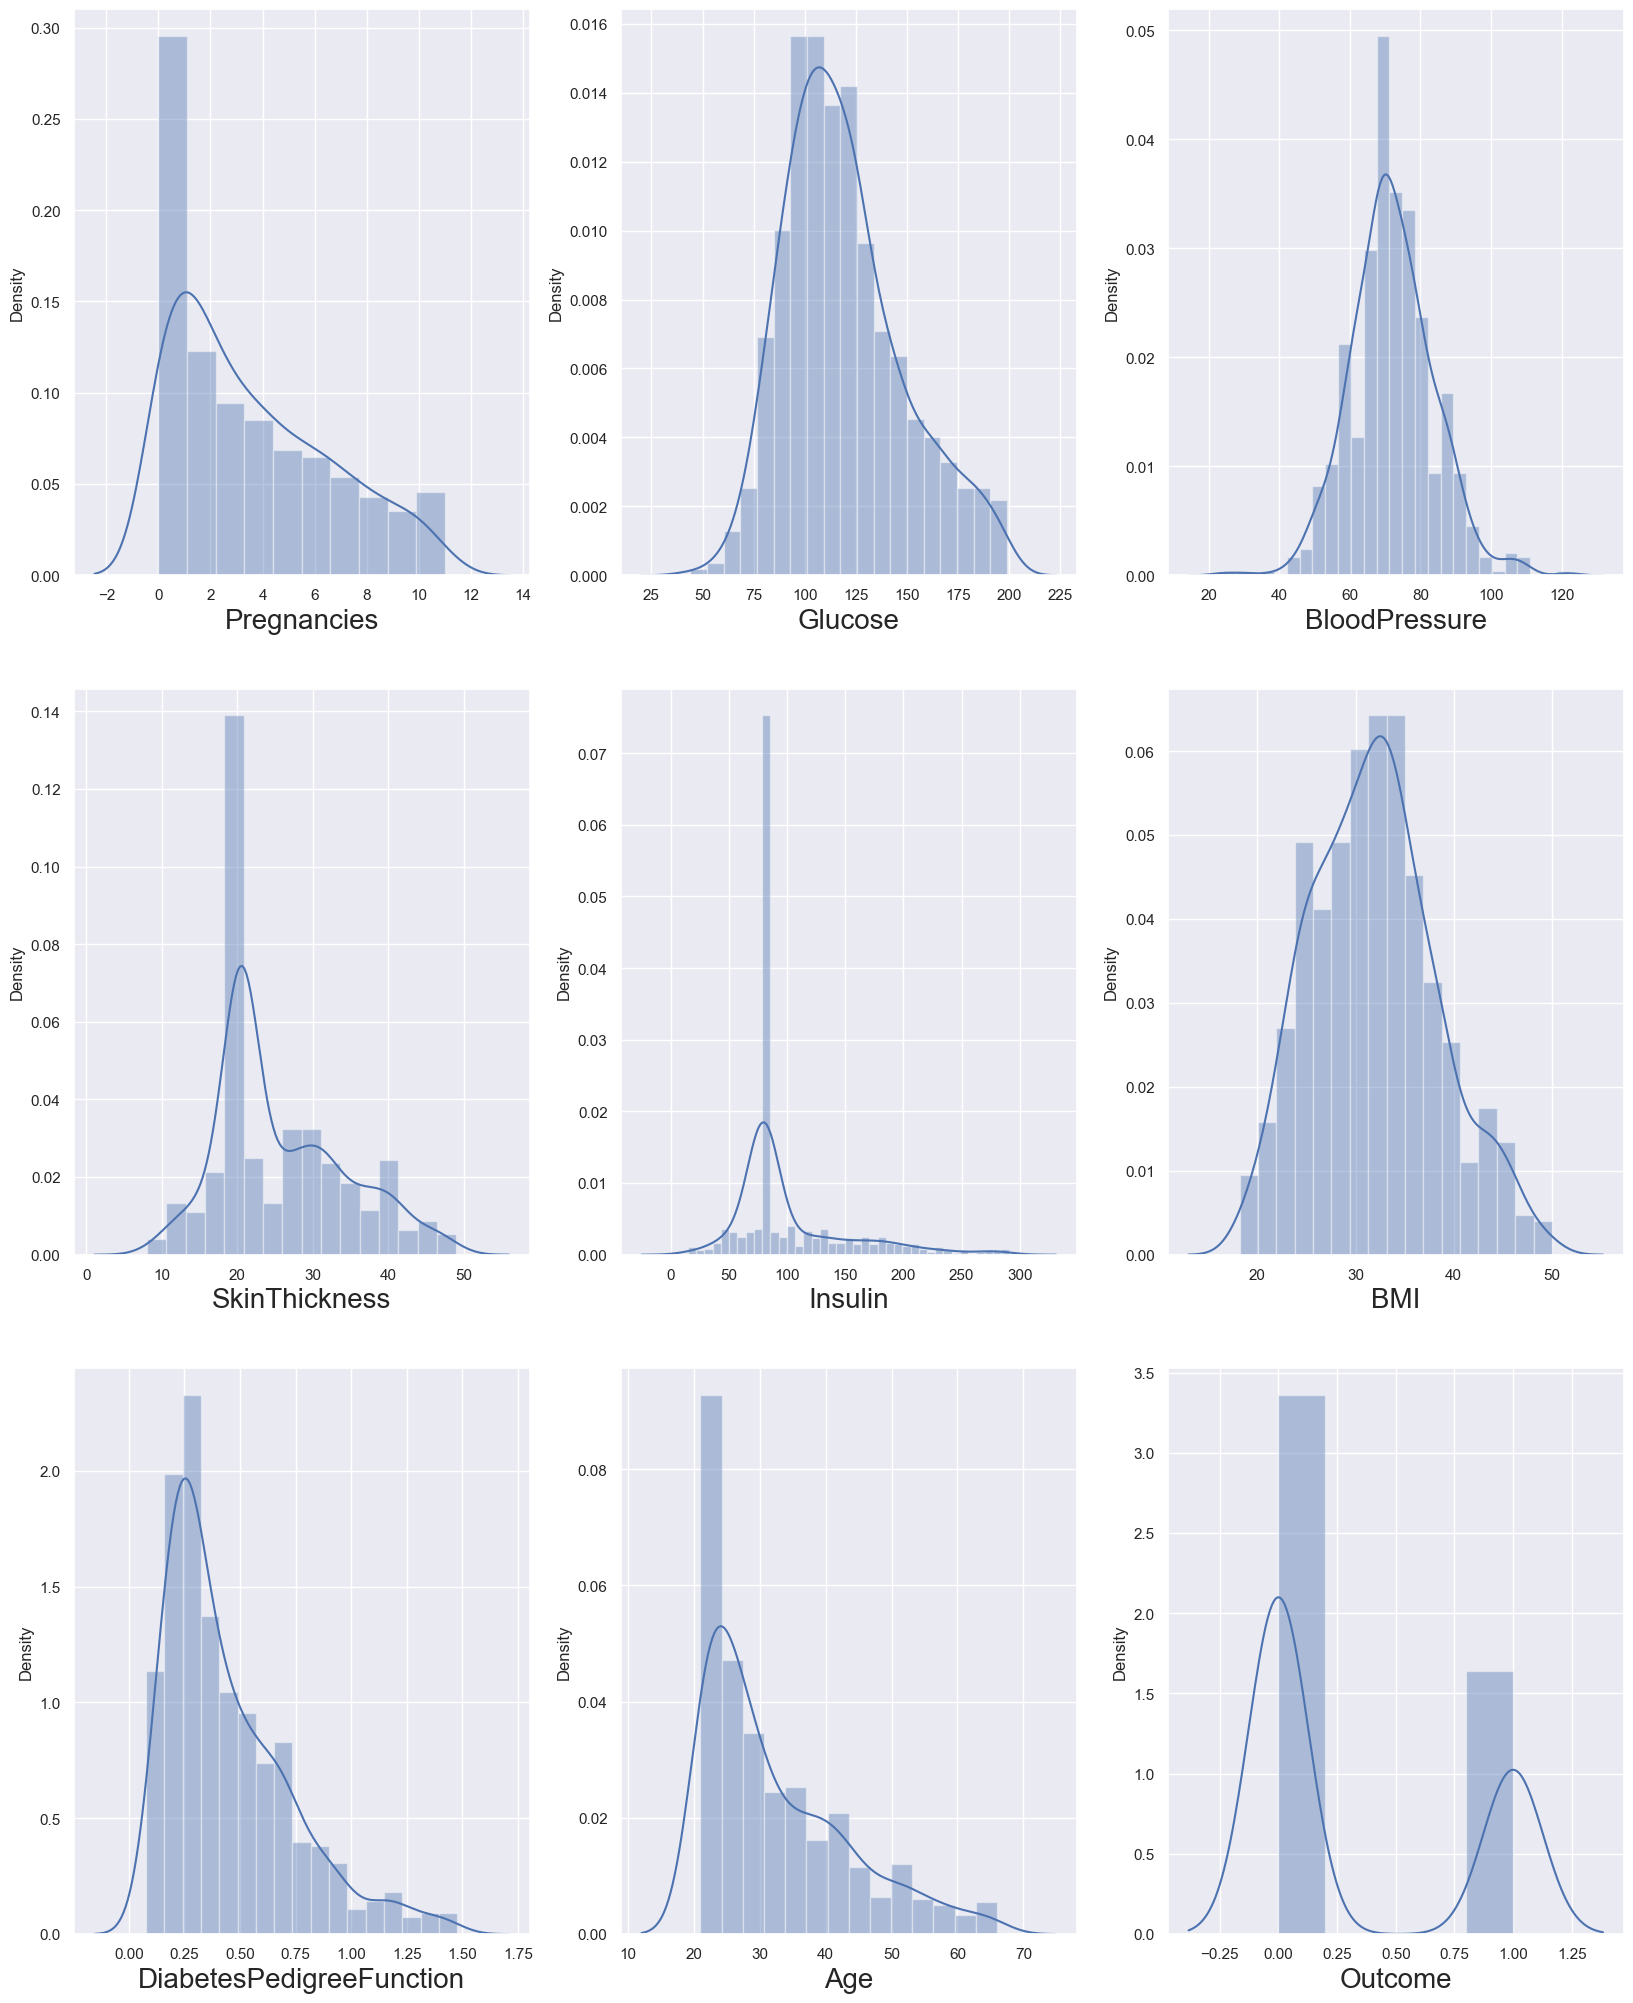

In [19]:
# let's again see the distribution


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- The data looks much better now than before. 
- We will start our analysis with this data now as we don't want to lose important information. 
- If our model doesn't work with accuracy, we will come back for more preprocessing.

<AxesSubplot:>

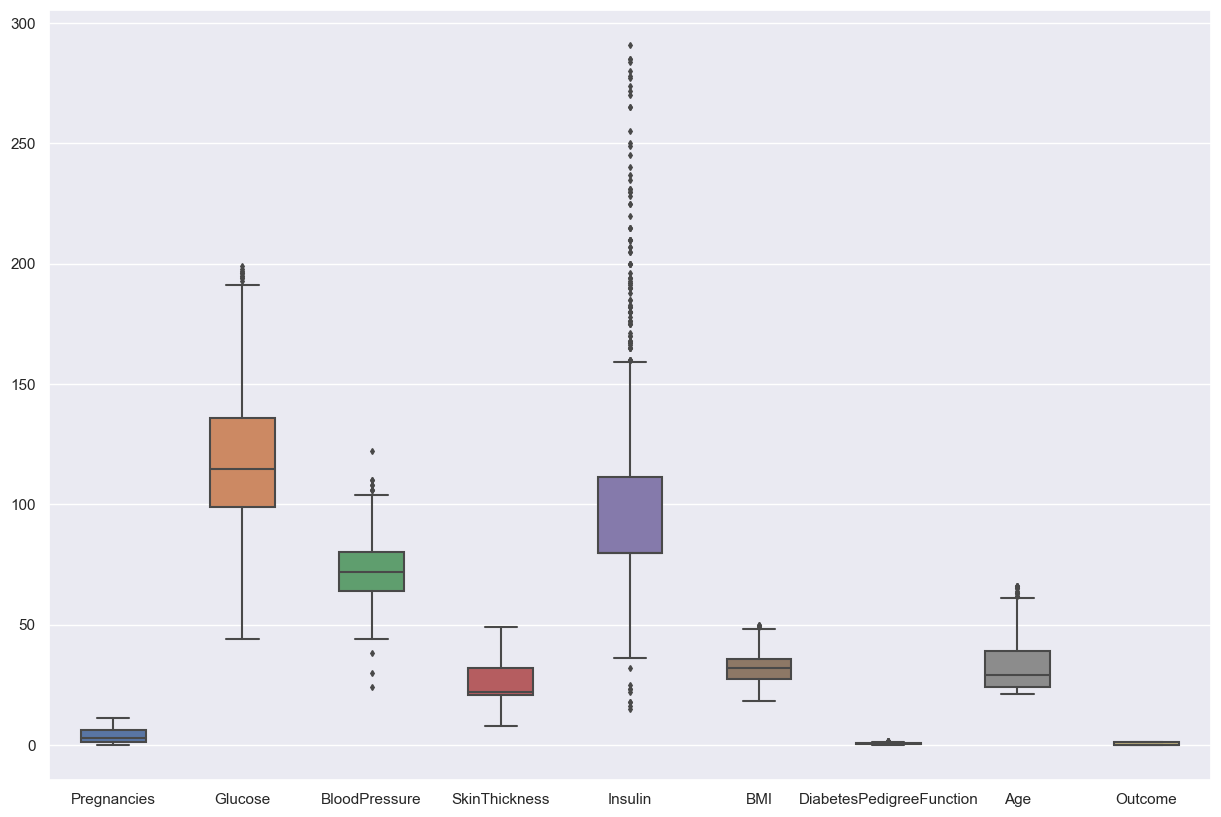

In [20]:
# Let's see the Box plot again but with the cleaned data

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5, ax=ax, fliersize=3)

- There are still some outliers persist in some columns but most of the columns are now outlier free.
- But as the dataset is very small so if we drop more outliers the dataset will become smaller.
- Although we can do some transformation techniques like `BoxCox` or `log` transformations.

In [21]:
# Let's see the cleaned dataset

data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [22]:
# Now let's seperate the output and input features

X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

In [24]:
# let's check the input features

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [25]:
# Let's check the output feature

y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

**Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.**

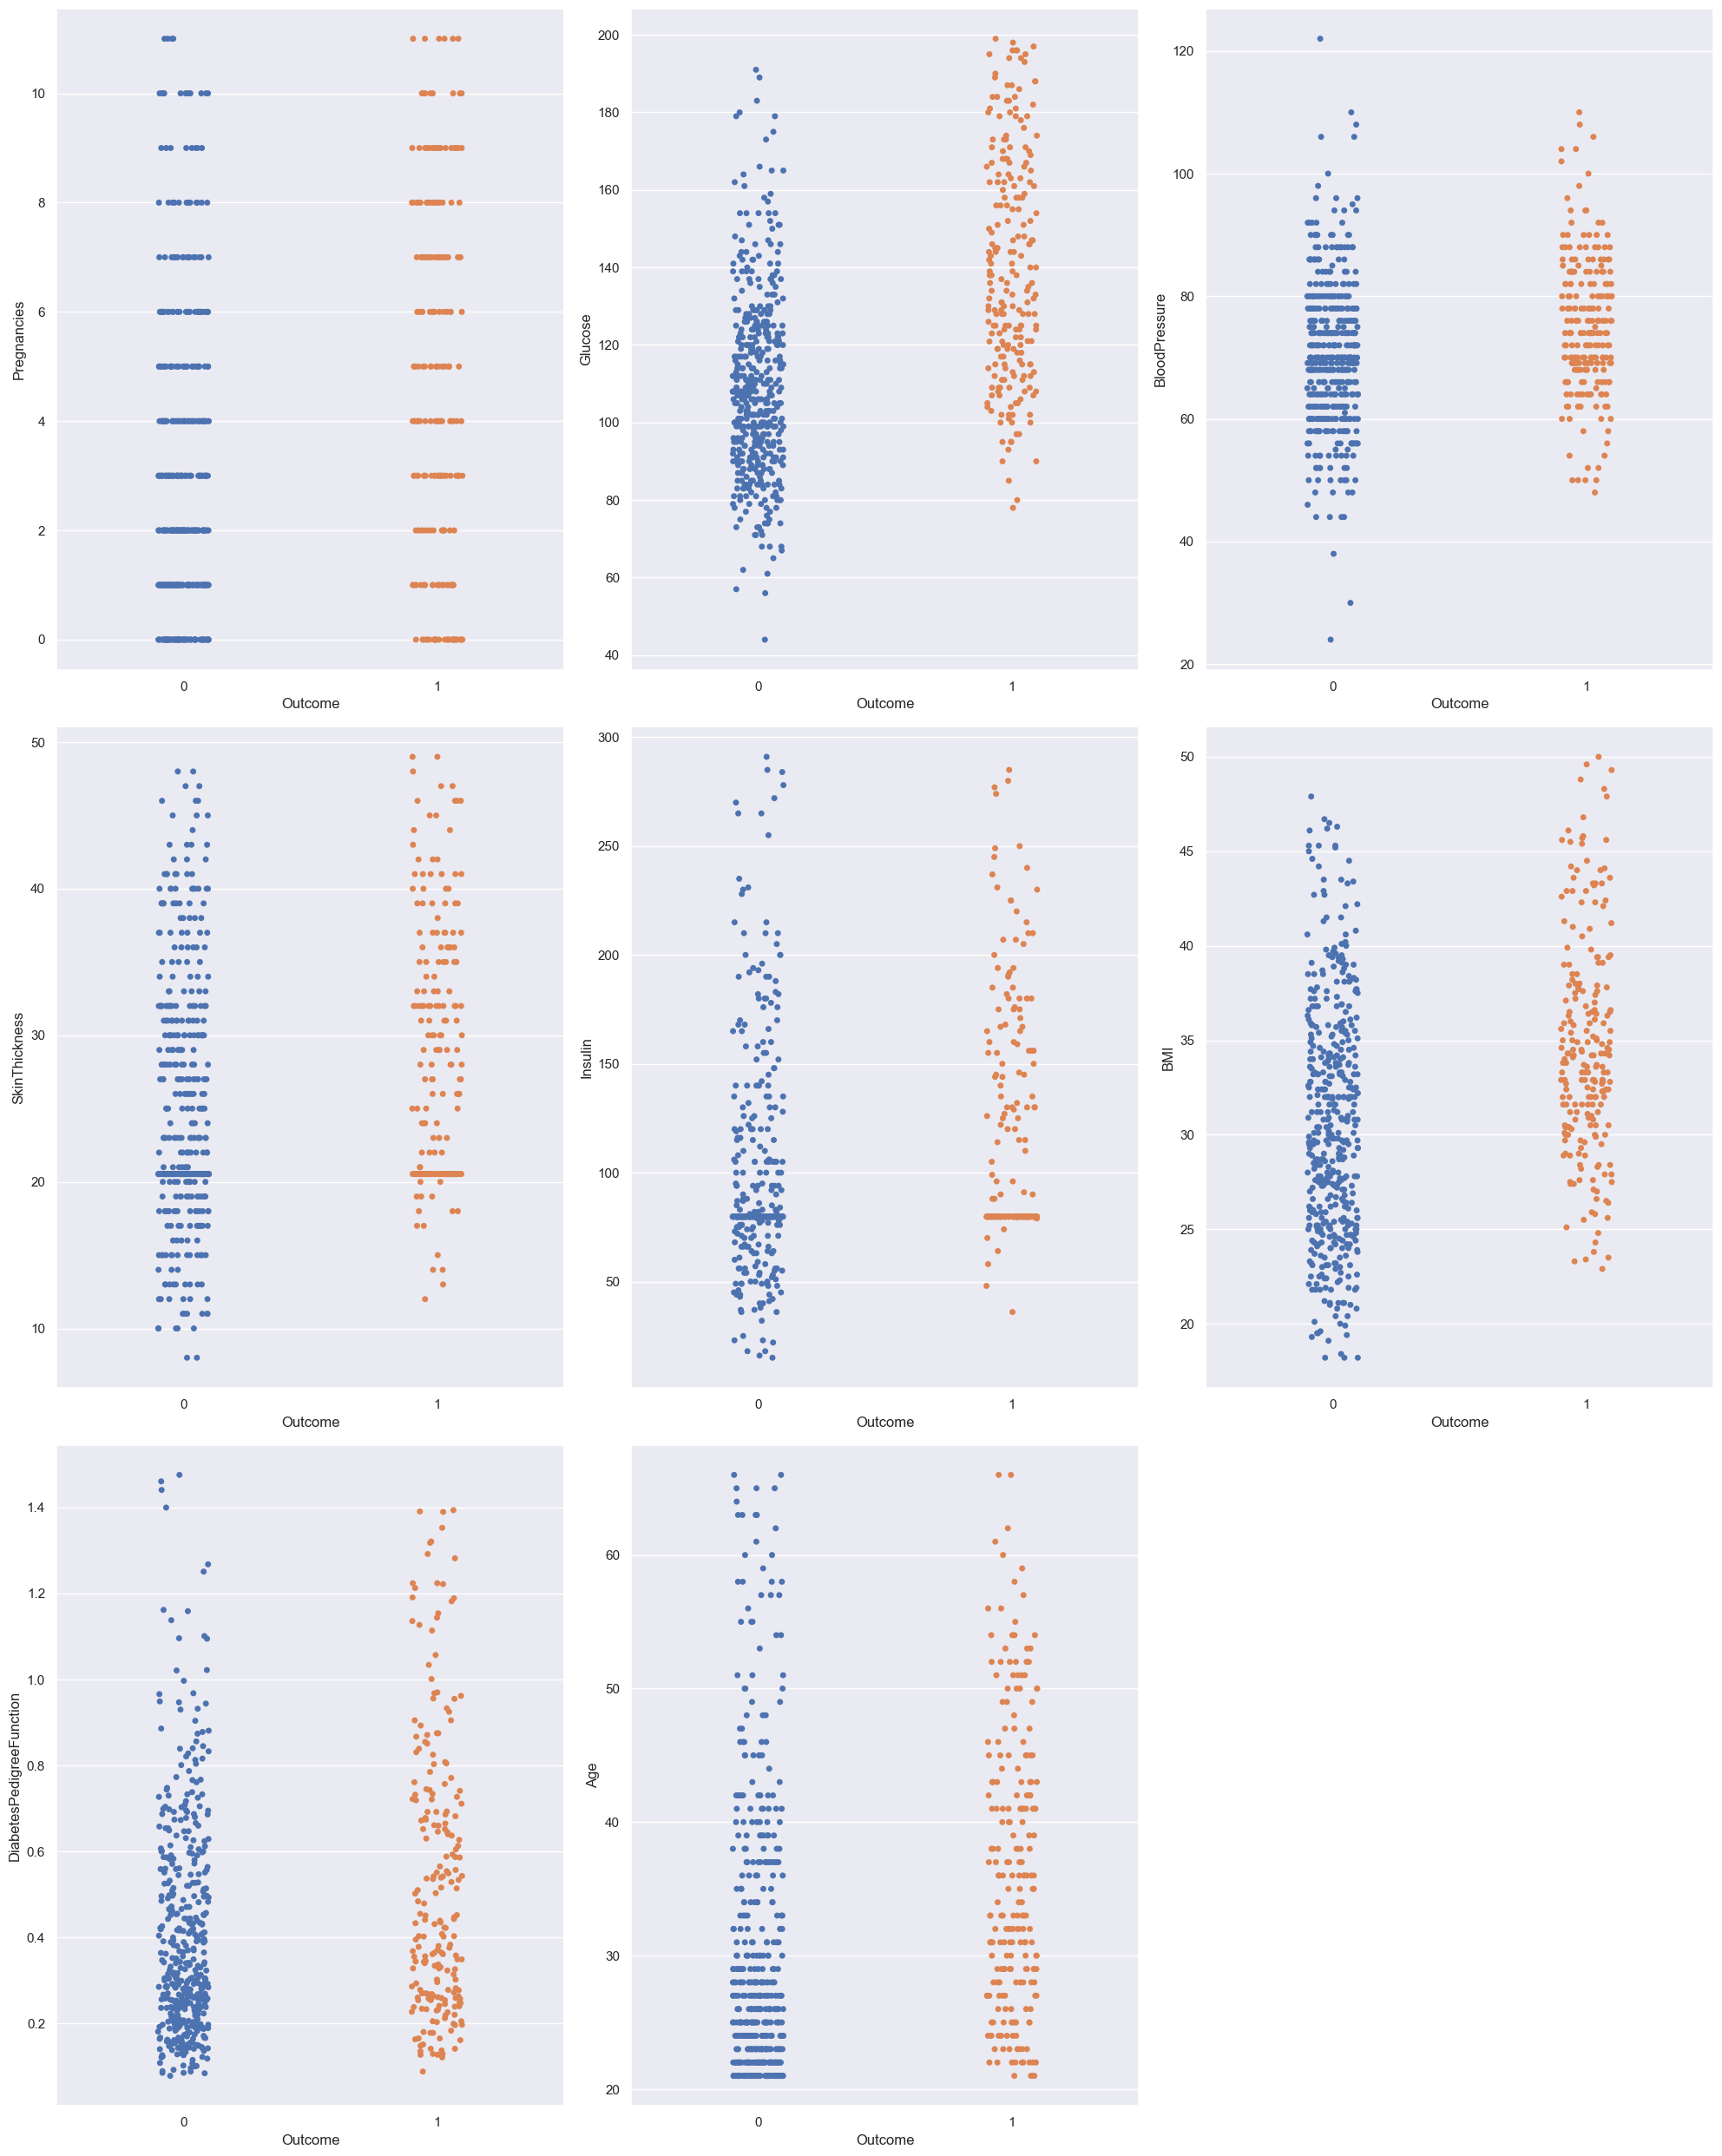

In [26]:
# let's see how data is distributed for every column
# Here we use the stripplot() to see dispersion between categorical data (Output) and numerical data (inputs)
# As here the 'Outcome' column has binary value (categorical) and all the features of X variable has numeric values.
# The dots are representing the data points.


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()

- Let's proceed by checking multicollinearity in the dependent variables. 
- Before that, we should scale our data. 
- Let's use the standard scaler for that.

In [27]:
# Let's perform scaling of data for features in X

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

- This is how our data looks now after scaling. Great, now we will check for multicollinearity using **VIF(Variance Inflation factor)**

In [28]:
# multicollinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


- All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

### Model building

In [29]:
# Let's create train and test dataset

x_train,x_test,y_train,y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state = 355)

In [30]:
# Create the model and training it

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
# testing our model with test data

y_pred = log_reg.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [32]:
# checking accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.834319526627219

In [33]:
# creating a Confusion Matrix


conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[109,   8],
       [ 20,  32]], dtype=int64)

#### Finding all the performence metrics one by one

In [34]:
# Distributing the values for the TP, TN, FP, FN from the confusion matrix

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [35]:
# Checking Accuracy

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.834319526627219

In [36]:
# Checking Precison

Precision = true_positive/(true_positive+false_positive)
Precision

0.9316239316239316

In [37]:
# Checking Recall

Recall = true_positive/(true_positive+false_negative)
Recall

0.8449612403100775

In [38]:
# Checking F1 Score

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8861788617886178

### Pickling:

- The Logistic Regression is a mathematical equation, so everytime we put a new value to the the 'z' in the equation we get an output between 0 to 1. This output can be saved as `.csv` file, but the system will not be able to processed the data, so instead we need to serialize the output data. It means that we are going to convert the data that we would store in the `.csv` file i.e. `[0, 1]` into a `.pkl` or `.sav` format.

- So basically if we want to save the trained model into a physical file and used it later for test prediction we need to save it using the pickle. As the model is nothing but a mathematical equation/model.

- This **pickling** means encrypting the model into a physical file.




- **Serialization:**

    - Suppose, `x= 10` and `y = 20` and `z = x + y`
    - Then if we do `print(z)` we would get the outcome as `30`. 
    - Now as the system only understands binary data, so the compiler would convert this entire thing into bits i.e. `0`, `1`.
    - So here also the output would be converted to `0` and `1`, so the system would understand.
    - So in **Serialization** it compress the actual value so the system can understand the value.
    - So it means everytime we don't need to use the mathematical equation.
    - We just compress our mathematical data and store it in a pickle file.
    - And as a result the pickle file can generate automatic outputs on the basis of the data stored in it.

In [39]:
# pickling or saving the model


import pickle

# Saving or dumping the prediction of the model

with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [41]:
# Loading the model

with open('modelForPrediction.pkl', 'rb') as f:
    pickle.load(f)

### Assignment:

- Perform Logistic Regression on Algerian forest dataset with 90% accuracy if the data is not imbalanced. And there should not be any Overfitting and Underfitting condition.



- If data is imbalanced:
    - Scenario 1: First handle the imbalanced data and then perform Logistic Regression.
    - Scenario 2: First create a model, and instead of Accuracy choose either Precision, Recall or F1-Score.